In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from scipy.spatial import distance
from similarities import probs_schmidt_in_energy_eigenstates
from similarities import cos_similarity_btw_s1_s2_plot
from similarities import metric_similarity_btw_s1_s2_plot
from similarities import time_cos_similarity_plot
from similarities import time_cos_similarity_plot_new
from similarities import similarity_btw_s1_s2_plot_compare_w
from VN import plot_VN



We explore the time similarity of the Schnmidt states

In [47]:

# Generate random vectors
vector1 = np.abs(np.random.randn(d1*d2))
vector2 = np.abs(np.random.randn(d1*d2))


# Normalize the vectors
vector1 = vector1 / np.linalg.norm(vector1)
vector2 = vector2 / np.linalg.norm(vector2)
d = 1 - distance.cosine(vector1, vector2)
print(d)
vector1 = np.sqrt(vector1)
vector2 = np.sqrt(vector2)

d = 1 - distance.cosine(vector1, vector2)
print(d)

0.6323620314315146
0.8460921239762826


The similarity between 2 random probability distirbution is always ~0.84, meaning that if we get values different than this in our time_similarity graphs, there is something interesting.

In [35]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

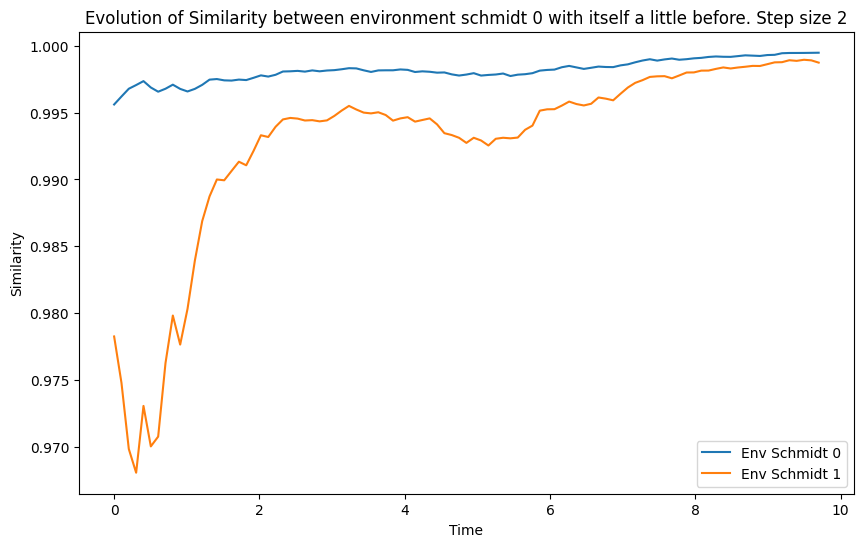

In [36]:
step = 2
time_cos_similarity_plot_new(result,tlist,H_total,Int_strength,w,step)

Note that we only look at the environment Schmidt state. Maybe we should look at the full schmidt state? since the system state does vary in time (ie, it goes from superposition of 2 eigenstates, to just one eigenstate of the system)

Very weirdly, the 2 states have very difference behavior.


In [37]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

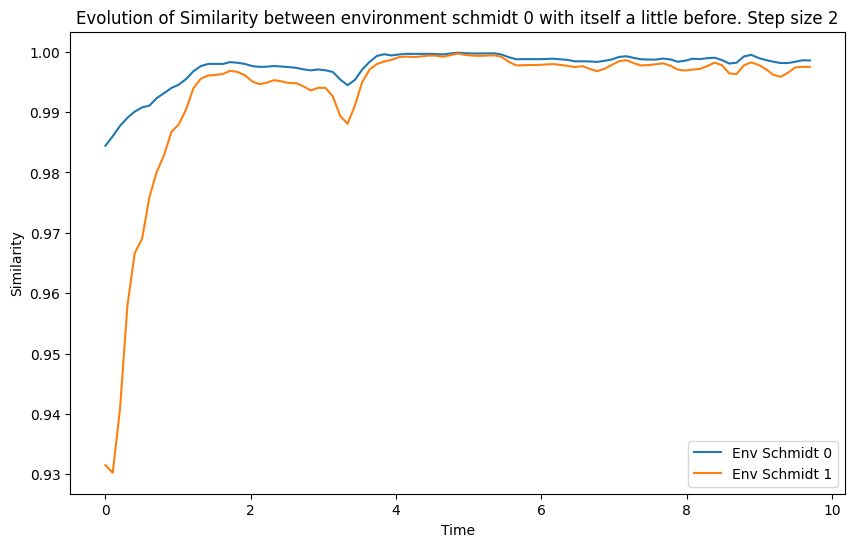

In [38]:
time_cos_similarity_plot_new(result,tlist,H_total,Int_strength,w,step)


In [39]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

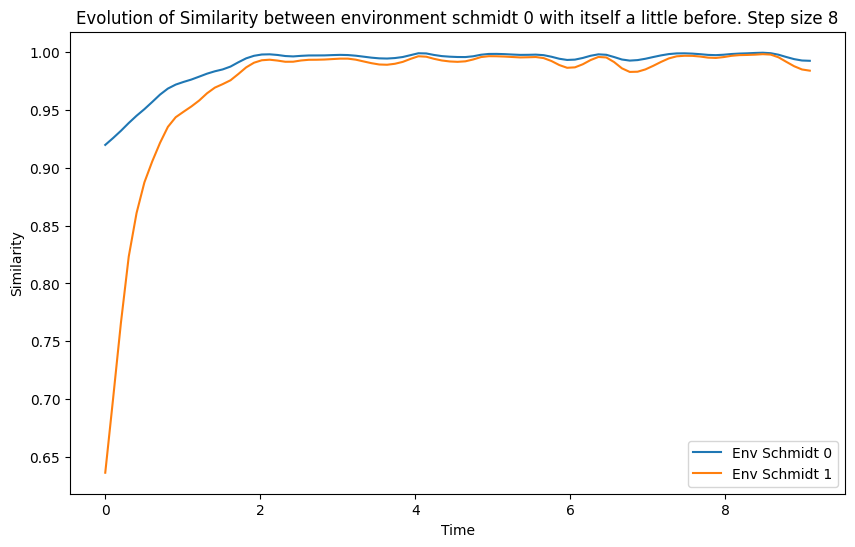

In [44]:
time_cos_similarity_plot_new(result,tlist,H_total,Int_strength,w,8)


In [41]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.15
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

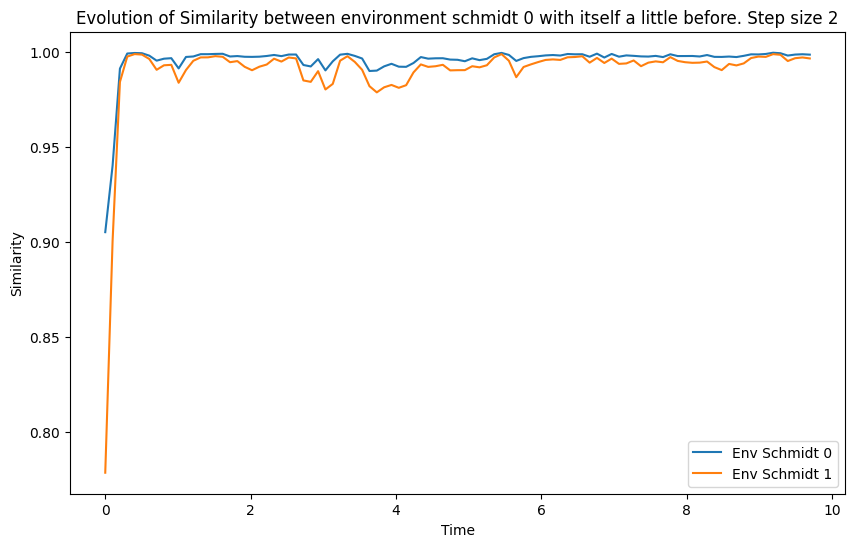

In [42]:
time_cos_similarity_plot_new(result,tlist,H_total,Int_strength,w,step)


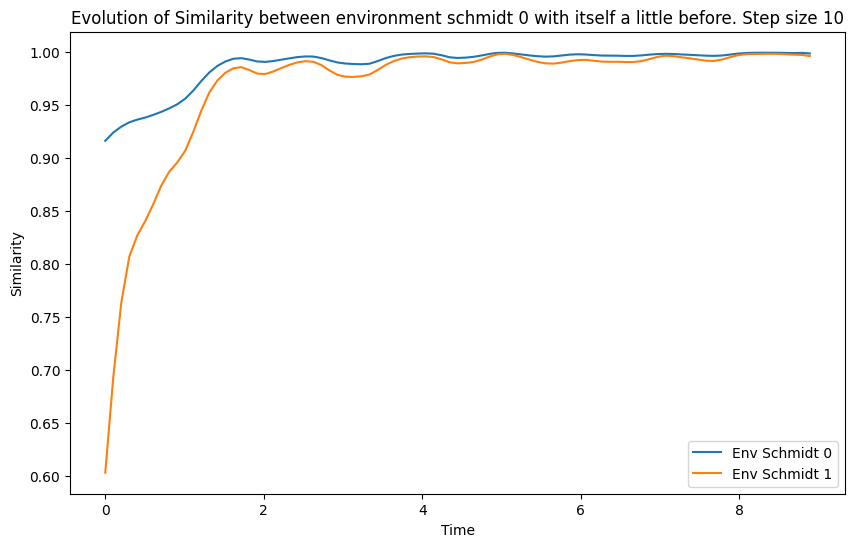

In [48]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
step = 10
time_cos_similarity_plot_new(result,tlist,H_total,Int_strength,w,step)

The general trend is up. Schmidt 2 starts lower than Schmidt 1, which can be understoods by looking at the gifs, since Schmidt 2 starts diffused and quickly goes to a shaoe similar to Schmidt 1. But we also see Schmidt 1 gain in time similarity from the get go, meaning that when decoherence starts, it creats high fluctuations in value for the schmidts, but that over time, they stop fluctuating.

The higher the enrgy, the faster the decoherence, explaing the sharper curves.

We also observe that the 2 curves, post decoherence, have similar variations, ie similar ups and downs. We have the same variation in fluctuation in Schmidt 1 and Schmidt 2. 

Note that the cosine distance of the sqrt vectors of 2 random distributions is ~0.84, so there is a convergence to vectors that change little in time.

The last graph was to illustrate that even over steps = 10, the similarity converges to 1. We conclude that the distributions barely changes after decoherence

We now look at the Schmidt 1 to Schmidt 2 similarity.

In [11]:

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#using all above to obtain QM qtts
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)


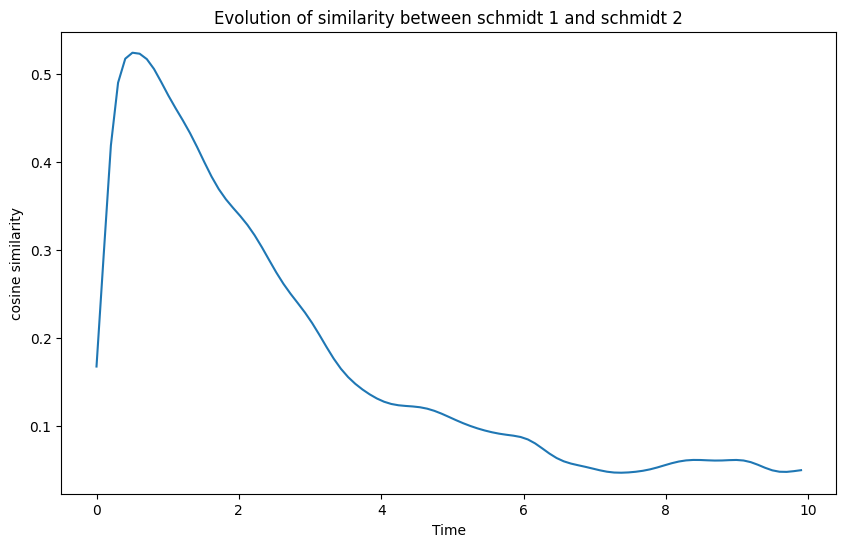

In [36]:
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

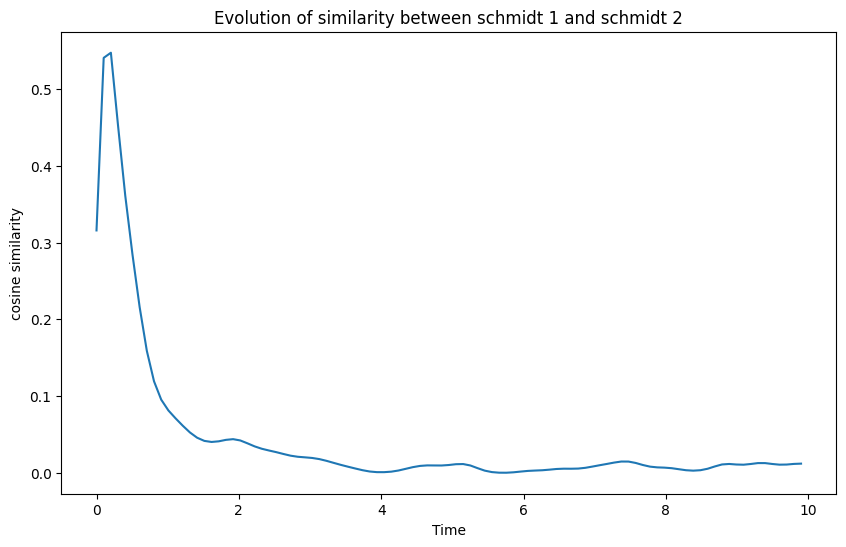

In [37]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

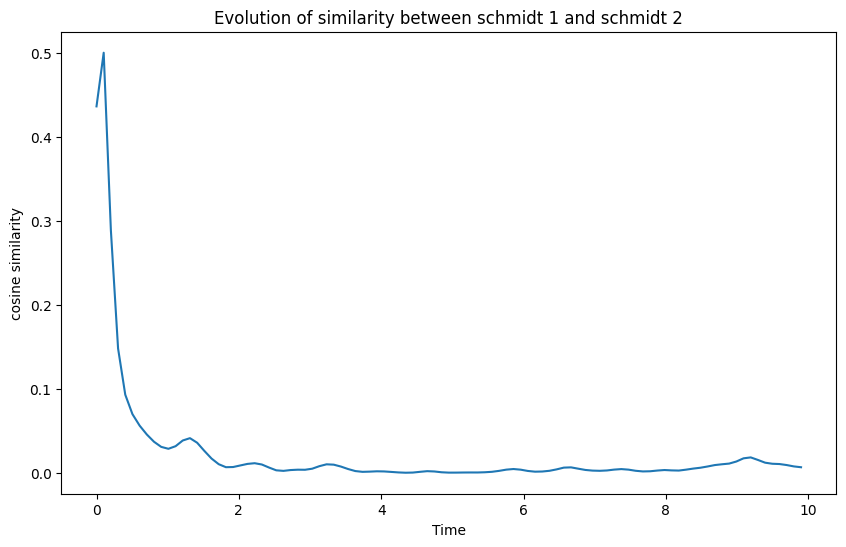

In [38]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.09
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

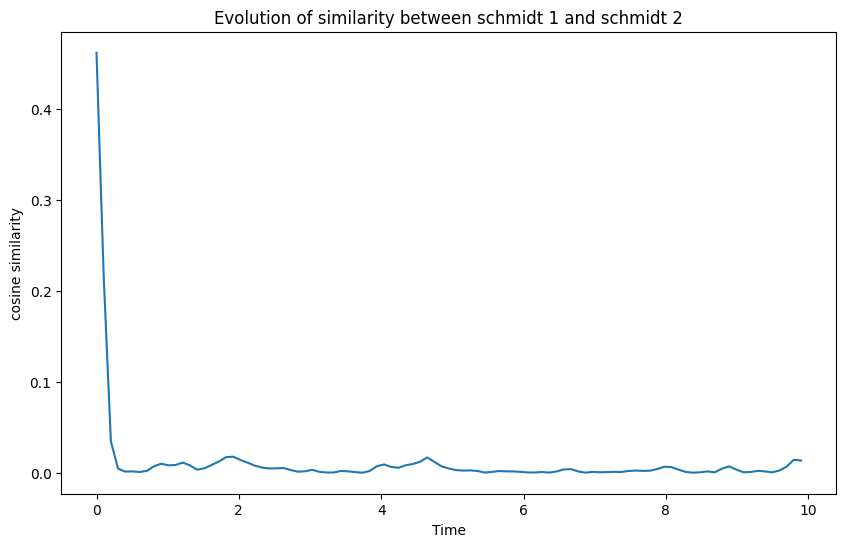

In [39]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.15
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

We see an initial increase in similarity, before a decrease that takes a longer time for lower interaction strengths.

We dont really see a change in how low or high the similarities go

This can be compared to the gifs where we see the distribution for schmidt 1 start already in a peaked form get a bit sharper and just fluctuate a bit. The distrib of schmidt 2 starts spread out and gets sharper with a shape not exactly that at schmidt 1 (dep on w and q).

So there may be an effect where the drastic change of schmidt 2 to a shape like schmidt 1 makes the simimlarity peak, before even though the shape stays similar, the schmidts become different...

We now look at the impact of w

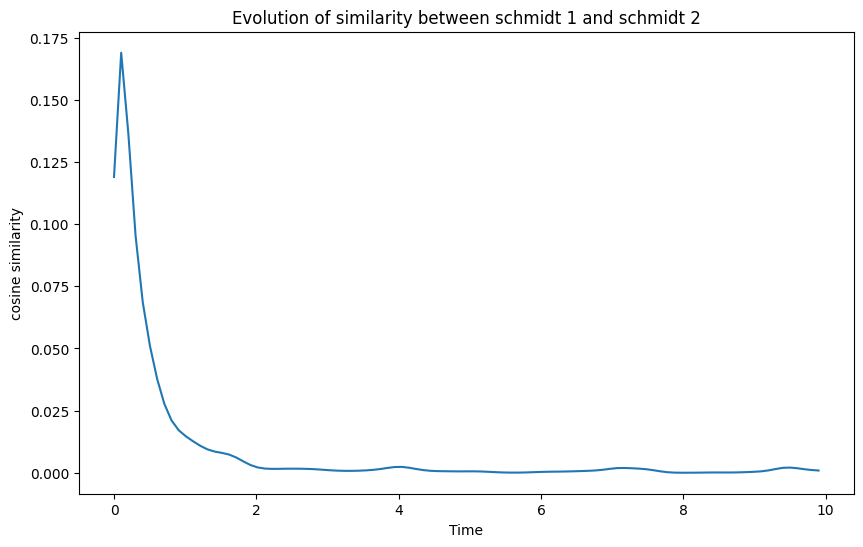

In [40]:
d1, d2 = 10, 200
w = 0.1
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

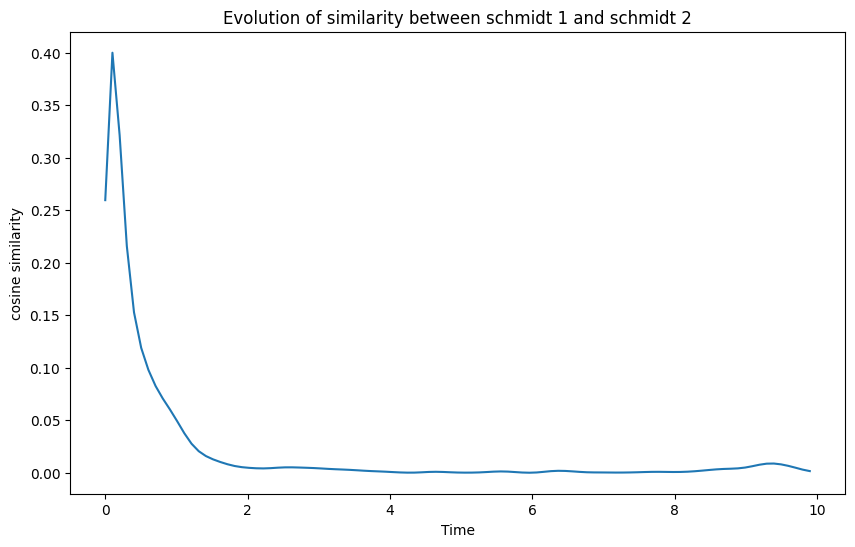

In [41]:
d1, d2 = 10, 200
w = 0.2
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

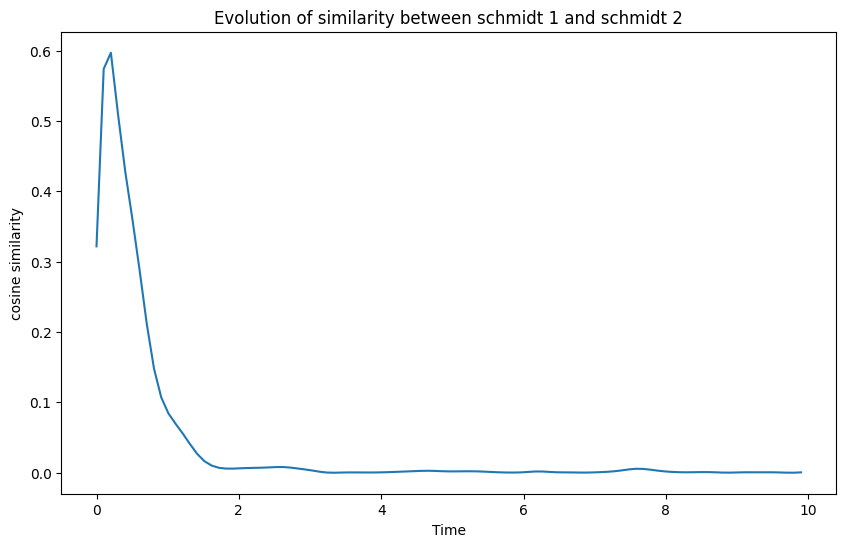

In [42]:
d1, d2 = 10, 200
w = 0.3
E_spacing = 1.0
Int_strength = 0.06
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


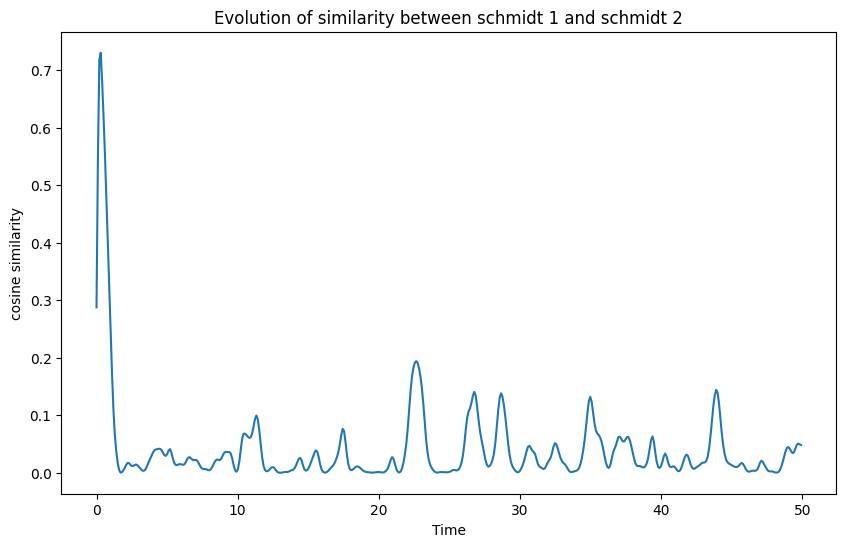

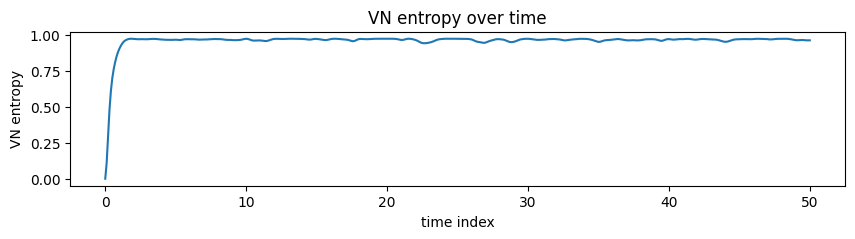

In [3]:
d1, d2 = 10, 200
w = 0.4
E_spacing = 1.0
Int_strength = 0.06
tmax= 50
ind_nb = 500
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)
plot_VN(result,tlist)


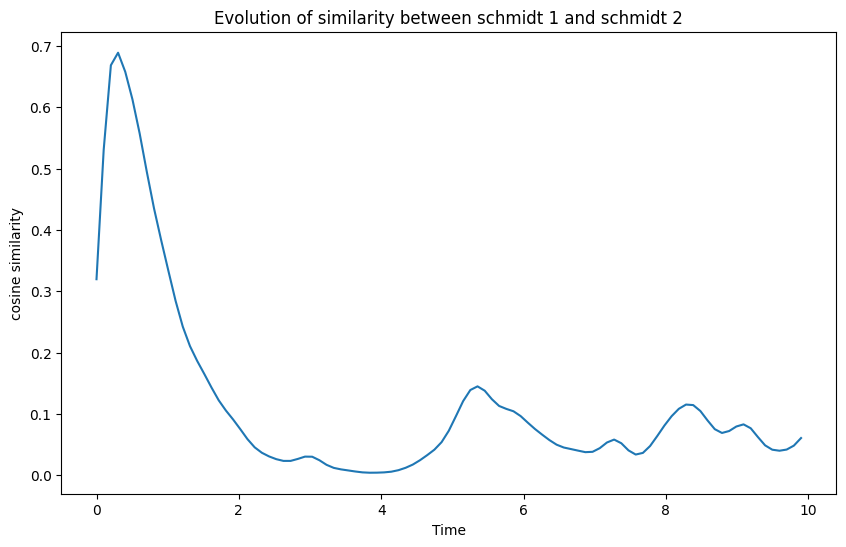

In [4]:
d1, d2 = 10, 200
w = 0.4
E_spacing = 2.0
Int_strength = 0.03
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 
s1_list,s2_list = probs_schmidt_in_energy_eigenstates(result,eigenenergies_total, eigenstates_total,tlist,Int_strength,w)
cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)

Result is no. Annoyingly changing E_spacing makes the effectiv interaction strength higher, so the peak smaller. 


Note that the cosine distance between the sqrt of 2 randome probability distributions is ~0.63, so clearly a selection to 2 very different distributions is happening.

Having played around with the cosin similarity and the other metric I defined, the cosine is fine.

The graph over 50 seconds is interesting, as we see that there are flucgtuations, but that overall the trend is down. the interesting point being that this down trend seems to be over a lot longer time period than the decoherence time visible in the entropy graph. Also plotting VN entropy we see that the fluctuations in similarity between s1 and s2 correspond to fluctuation in VN entropy.



In [2]:
d1, d2 = 10, 200
w = 0.4
E_spacing = 1.0
Int_strength = 0.06
tmax= 20
ind_nb = 200
similarity_btw_s1_s2_plot_compare_w(d1,d2,w, E_spacing, Int_strength,tmax,ind_nb)

Alright. First note on this. w = 0.5 is way too different. Something weird is going on there, but i dont think its the order of the schmidts just going back and forth, since we dont see step changes in our other curves.

Asymmetry between w=0.3/0.7 or 0.2/0.8 (ie opposite pairs) explained by different q's.

The order and shape of the curves are pretty well repeated over multilpe runs

We see that the impact of w is on the hights of similarity reached, the speed at which a low similarity is reached and its stability.

Could this be linked to the ability of the scdhmidt states to find stability? Are schmidt states from w=0.4,0.6 less stable than the other ones? I want to explore the s1-s2 similarityv alongsisde the sienv(t) and sienv(t+k) similarity. It would be interesting to find that with w=0.3, the schmidt states have trouble finding stability, which would be reflected in this graph, and could maybe be explained by a non-equilibrium distribution in the energy spectrum
